<a href="https://colab.research.google.com/github/aradyzah/Analisis-Pengguna-Shopee-pada-Platform-X/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/shopee_cleaned.csv')
texts = df['cleaned_text'].astype(str)


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('indonesian')

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000, stop_words=stop_words)
X = vectorizer.fit_transform(texts)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


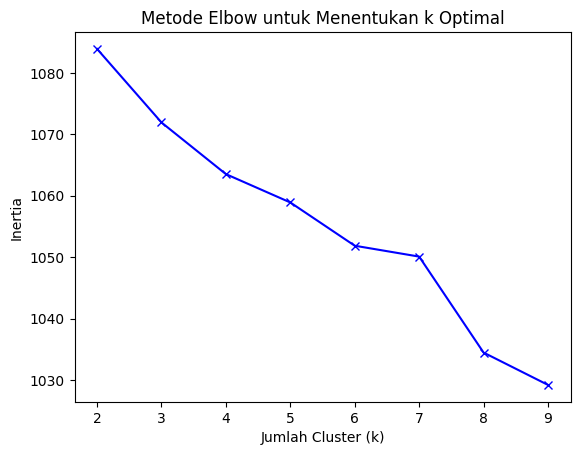

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)


In [ ]:
import numpy as np

terms = vectorizer.get_feature_names_out()
for i in range(optimal_k):
    cluster_center = kmeans.cluster_centers_[i]
    top_terms = [terms[t] for t in cluster_center.argsort()[-10:]]
    print(f"\nCluster {i} top words:")
    print(", ".join(top_terms))



Cluster 0 top words:
murah, amp, pembelian, aja, kak, diskon, nya, beli, link, shopee

Cluster 1 top words:
samsung, apple, sneakers, black, wifi, pria, shopee, dapatkan, temukan, seharga

Cluster 2 top words:
handphone, air, portable, sandal, tas, wanita, shopee, dapatkan, harga, cek


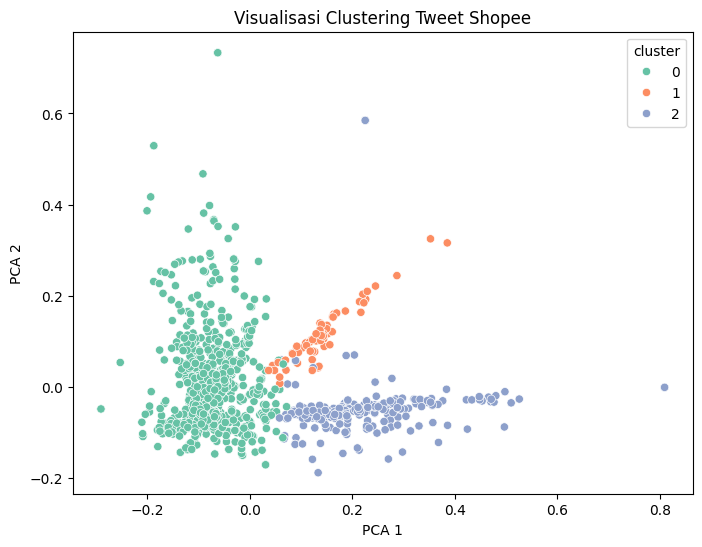

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2, random_state=42)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced[:,0], y=reduced[:,1], hue=df['cluster'], palette='Set2')
plt.title('Visualisasi Clustering Tweet Shopee')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [ ]:
df.to_csv('/content/drive/MyDrive/shopee_clustered.csv', index=False)
